## Top Golf Courses in the United States Natural Language Process (NLP) Anlysis Overview

1. **Compare TF-IDF vs Doc2Vec for feature extraction** 
    - Vectorize the reviews using both TF-IDF and Doc2Vec (gensim library).
    - TF-IDF represents documents as a weighted vector of important words. Doc2Vec learns semantic vector representations of documents.
    - Compare the two approaches qualitatively and quantitatively (e.g. in downstream clustering/classification tasks) to see which captures more meaningful information from the reviews.

2. **Compare K-means clustering vs LDA for topic modeling**
    - Apply K-means clustering and LDA on the vectorized reviews to discover latent topics/themes discussed 
    - K-means aims to partition the reviews into K clusters based on feature similarity. LDA is a probabilistic model that assigns topic distributions to documents.
    - Evaluate the coherence and interpretability of the topics/clusters found by each method. Use metrics like silhouette score, perplexity, human judgment.

## Pre-phase: Importing Necessary Packages and Setting Up the Virtual Environment

In [2]:

"""
PRE-PHASE: SET UP THE ENVIRONMENT

Set up the environment with the necessary libraries, packages, and display configurations

Note: this code is written in Python 3.9, as this version of Python is compatable with the GenSim library
"""
# Enable multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import the necessary libraries and packages
# Regular expressions, string manipulation, and file system operations
import re, string, os
# Data manipulation and analysis
import pandas as pd
# Scientific computing
import numpy as np
from numpy import triu
import scipy
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Natural language processing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
# Gensim for topic modeling
from gensim.models import Word2Vec, LdaModel, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Display configurations
plt.style.use('ggplot')
sns.set_style('whitegrid')
# Set the random seed for reproducibility
np.random.seed(42)

# Download the English language model for spaCy
# !python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefanjenss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Phase 1: Import the Corpus of Golf Course Reviews for the Top 30 Courses in the United States

In [3]:
"""
PHASE 0: IMPORT THE GOLF COURSE REVIEW CORPUS AND CONVERSION TO CSV FILE AND DATAFRAME
    1. Firstly, since I created the golf course review corpus using Excel, I will need to convert the Excel file to a CSV file. 
       I will use the pandas library to do this.
    2. Secondly, I will use the pandas library to read the CSV file and create a DataFrame.
"""

# Convert the Excel file to a CSV file
# Read the Excel file
FILE = 'golf_course_review_corpus.xlsx'
golf_course_review = pd.read_excel(FILE)

# Save the DataFrame to a CSV file
golf_course_review.to_csv('golf_course_review_corpus.csv', index=False)

# Read the CSV file and create a DataFrame
golf_course_review = pd.read_csv('golf_course_review_corpus.csv')
golf_course_review.head()

'\nPHASE 0: IMPORT THE GOLF COURSE REVIEW CORPUS AND CONVERSION TO CSV FILE AND DATAFRAME\n    1. Firstly, since I created the golf course review corpus using Excel, I will need to convert the Excel file to a CSV file. \n       I will use the pandas library to do this.\n    2. Secondly, I will use the pandas library to read the CSV file and create a DataFrame.\n'

,review_id,course_name,location,architect,year_built,review_title,review_author,file_name,review_text
0,1,Pine Valley,"Pine Valley, NJ",George Crump / Harry S. Colt,1918,PINE VALLEY GOLF CLUB - 19 POINTS,David Jones,rev1_pine_valley_1,There’s not much point trying to do a hole-by-...
1,2,Pine Valley,"Pine Valley, NJ",George Crump / Harry S. Colt,1918,"Pine Valley Golf Club (Clementon, New Jersey)",Bill Satterfield,rev2_pine_valley_2,What to Expect: Pine Valley is the finest gol...
2,3,Cypress Point,"Pebble Beach, CA",Alister MacKenzie,1928,Cypress Point,top100golfcourses,rev3_cypress_point_1,Every true golfer would love to play Cypress P...
3,4,Cypress Point,"Pebble Beach, CA",Alister MacKenzie,1928,"Cypress Point Golf Club (Pebble Beach, Califor...",Bill Satterfield,rev4_cypress_point_2,What to Expect: I don't even feel worthy to w...
4,5,Shinnecock Hills,"Southampton, NY",William Flynn,1931,Review: Shinnecock Hills Golf Club,Andrew Harvey,rev5_shinnecock_1,"There’s not many courses as acclaimed, sought ..."


'\nPHASE 1: Exploratory Data Analysis (EDA)\n\nIn this phase, I will perform an exploratory data analysis (EDA) on the golf course review corpus to gain a better understanding of\nthe data. I will perform the following tasks:\n    1. Calculate the summary statistics for the year_built column to better understand the distribution of when these top golf courses\n       were built.\n    2. Create a histogram and boxplot of the year_built column to visualize the distribution of when these top golf courses were built.\n    3. Create a frequency distribution for the architect to understand if there are certain architects that designed more of these\n       top golf courses.\n    4. Create a frequency distribution for the location column to understand the distribution of these top golf courses across different\n       states. \n         - Note: The location column contains both the city and state information, so I will need to extract the state information            \n'

count      60.000000
mean     1928.266667
std        26.483040
min      1895.000000
25%      1917.000000
50%      1924.500000
75%      1932.000000
max      2003.000000
Name: year_built, dtype: float64

<Figure size 1200x600 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_built', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Year Built for the Top 30 Golf Courses in the United States')

Text(0.5, 0, 'Year Built')

Text(0, 0.5, 'Frequency')

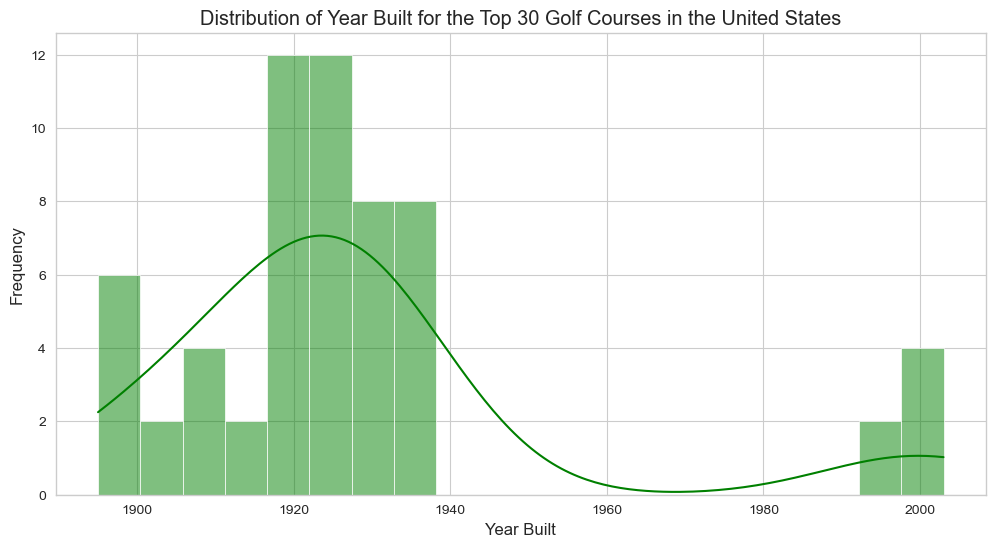

<Figure size 1200x300 with 0 Axes>

<Axes: xlabel='year_built'>

Text(0.5, 1.0, 'Box-and-Whisker Plot of Year Built for the Top 30 Golf Courses in the United States')

Text(0.5, 0, 'Year Built')

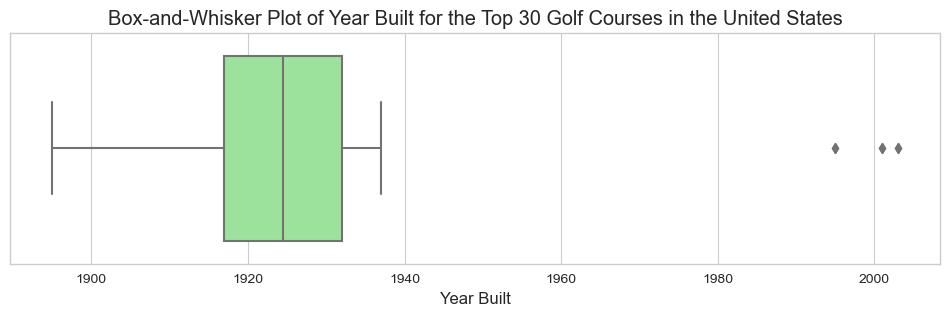

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='architect'>

Text(0.5, 1.0, 'Frequency Distribution of Architects for the Top 30 Golf Courses in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Architects')

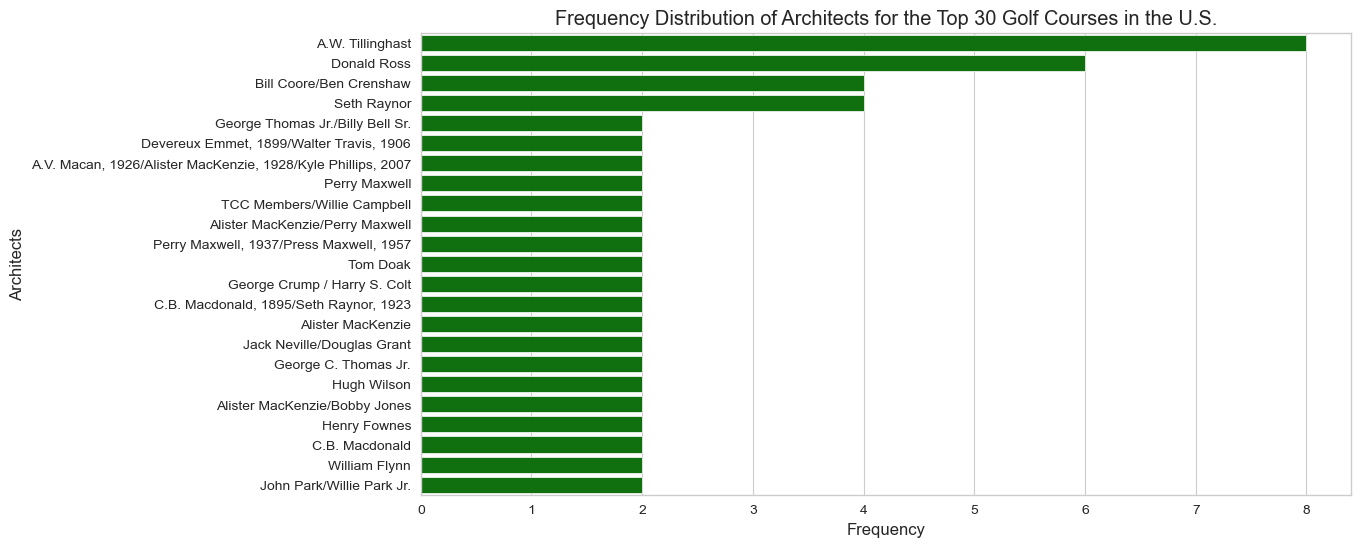

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='state'>

Text(0.5, 1.0, 'Frequency Distribution of Top 30 Golf Courses by state in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'State')

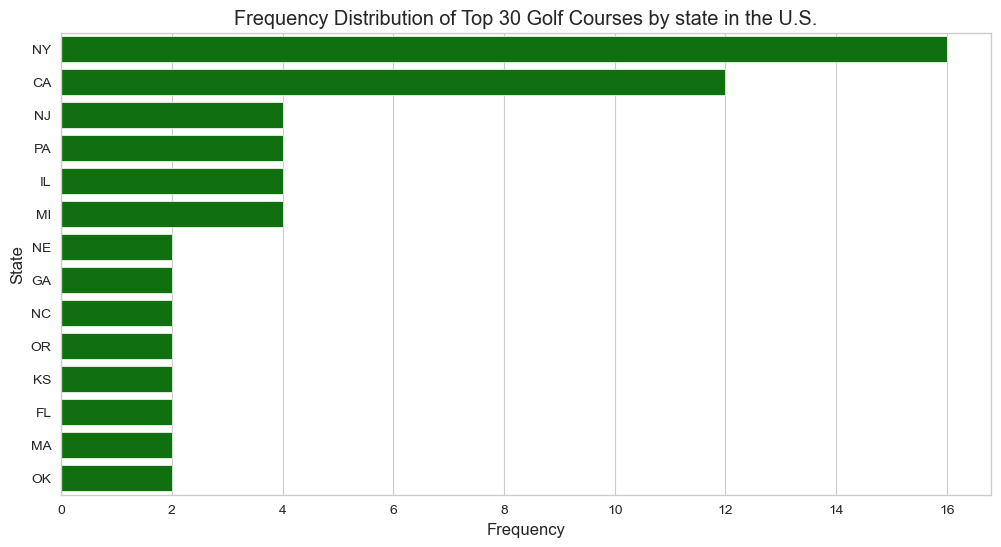

In [4]:
"""
PHASE 1: Exploratory Data Analysis (EDA)

In this phase, I will perform an exploratory data analysis (EDA) on the golf course review corpus to gain a better understanding of
the data. I will perform the following tasks:
    1. Calculate the summary statistics for the year_built column to better understand the distribution of when these top golf courses
       were built.
    2. Create a histogram and boxplot of the year_built column to visualize the distribution of when these top golf courses were built.
    3. Create a frequency distribution for the architect to understand if there are certain architects that designed more of these
       top golf courses.
    4. Create a frequency distribution for the location column to understand the distribution of these top golf courses across different
       states. 
         - Note: The location column contains both the city and state information, so I will need to extract the state information            
"""

### 1. Calculate the summary statistics for the year_built column ###
year_built_summary = golf_course_review['year_built'].describe()
year_built_summary

### 2.a Create a histogram of the year_built column ###
plt.figure(figsize=(12, 6))
sns.histplot(data=golf_course_review, x='year_built', bins=20, kde=True, color='green')
plt.title('Distribution of Year Built for the Top 30 Golf Courses in the United States')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

### 2.b Create a boxplot plot of the year_built column ###
plt.figure(figsize=(12, 3))
sns.boxplot(data=golf_course_review, x='year_built', color='lightgreen')
plt.title('Box-and-Whisker Plot of Year Built for the Top 30 Golf Courses in the United States')
plt.xlabel('Year Built')
plt.show()

### 3. Create a frequency distribution for the architect column ###
# Calculate the frequency of architects
architect_freq = golf_course_review['architect'].value_counts()
# Visualize the frequency distribution of architects
plt.figure(figsize=(12, 6))
sns.barplot(x=architect_freq.values, y=architect_freq.index, color='green')
plt.title('Frequency Distribution of Architects for the Top 30 Golf Courses in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('Architects')
plt.show()

### 4. Create a frequency distribution for the location column ###
# Extract the state information from the location column
golf_course_review['state'] = golf_course_review['location'].apply(lambda x: x.split(',')[-1].strip())
# Calculate the frequency of golf courses by state
state_freq = golf_course_review['state'].value_counts()
# Visualize the frequency distribution of golf courses by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_freq.values, y=state_freq.index, color='green')
plt.title('Frequency Distribution of Top 30 Golf Courses by state in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

In [5]:
"""
PHASE 2: DATA PREPROCESSING

The next step is to preprocess the text data. I will perform the following steps to clean the text data:
    1. Tokenization: Split the text into words
    2. Punctuation removal: Remove punctuation from the text
    3. Non-alphabetic token removal: Remove tokens that are not alphabetic
    4. Short token removal: Remove tokens that are less than 3 characters
    5. Lowercasing: Convert the text to lowercase
    6. Stopword removal: Remove stopwords from the text
        - For the stopword removal step, I will use the NLTK corpus, which provides a list of stopwords for the English language.
    7. Lemmatization: Reduce words to their base or root form
        - For the lemmatization step, I will use the spaCy library, which provides a fast and accurate lemmatization tool.
"""

# Define the function to preprocess the text data
def preprocess_test(text):
    tokens = word_tokenize(text)    # 1. Tokenization
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]    # 2. Punctuation removal
    tokens = [word for word in tokens if word.isalpha()]    # 3. Non-alphabetic token removal
    tokens = [word for word in tokens if len(word) > 2]    # 4. Short token removal
    tokens = [word.lower() for word in tokens]    # 5. Lowercasing
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]    # 6. Stopword removal
    # 7. Lemmatization using the spaCy libary
        # Load the English Language model
    nlp = spacy.load('en_core_web_sm')
        # Apply lemmatization to each token
    tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    # Return the preprocessed text as a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'review_text' column
golf_course_review['cleaned_review_text'] = golf_course_review['review_text'].apply(preprocess_test)

# Display the preprocessed text data
golf_course_review[['review_id', 'file_name', 'review_text', 'cleaned_review_text']].head()
    

'\nPHASE 2: DATA PREPROCESSING\n\nThe next step is to preprocess the text data. I will perform the following steps to clean the text data:\n    1. Tokenization: Split the text into words\n    2. Punctuation removal: Remove punctuation from the text\n    3. Non-alphabetic token removal: Remove tokens that are not alphabetic\n    4. Short token removal: Remove tokens that are less than 3 characters\n    5. Lowercasing: Convert the text to lowercase\n    6. Stopword removal: Remove stopwords from the text\n        - For the stopword removal step, I will use the NLTK corpus, which provides a list of stopwords for the English language.\n    7. Lemmatization: Reduce words to their base or root form\n        - For the lemmatization step, I will use the spaCy library, which provides a fast and accurate lemmatization tool.\n'

,review_id,file_name,review_text,cleaned_review_text
0,1,rev1_pine_valley_1,There’s not much point trying to do a hole-by-...,much point try holebyhole guide pine valley si...
1,2,rev2_pine_valley_2,What to Expect: Pine Valley is the finest gol...,expect pine valley fine golf course planet hol...
2,3,rev3_cypress_point_1,Every true golfer would love to play Cypress P...,every true golfer would love play cypress poin...
3,4,rev4_cypress_point_2,What to Expect: I don't even feel worthy to w...,expect even feel worthy write review cypress p...
4,5,rev5_shinnecock_1,"There’s not many courses as acclaimed, sought ...",many course acclaim seek document shinnecock h...


In [6]:
from sklearn.metrics import silhouette_score
"""
PHASE 3: COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING

In this phase, I will compare two popular text representation techniques, TF-IDF and Doc2Vec, for clustering the golf course reviews. 
I will perform the following steps to cluster the reviews using both techniques:
    1. TF-IDF representation: Convert the preprocessed text data into a TF-IDF matrix
    2. K-Means clustering: Cluster the reviews using K-Means clustering with the TF-IDF matrix
    3. Visualization: Visualize for TF-IDF clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques 
    4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data
    5. K-Means clustering: Cluster the reviews using K-Means clustering with the Doc2Vec model
    6. Visualization: Visualize the Doc2Vec clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques 
    7. Evaluation: Evaluate the clustering results using the Silhouette score and the Davies-Bouldin score
"""

### 1. TF-IDF representation ###
# Create a TF-IDF vectorizer
ifidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))   # Unigrams - meaning single words (1,1)
# Fit and transform the cleaned review text data
tfidf_matrix = ifidf_vectorizer.fit_transform(golf_course_review['cleaned_review_text'])
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=ifidf_vectorizer.get_feature_names_out(), index=golf_course_review['review_id'])
# Display the TF-IDF matrix
tfidf_df.head()

# Explore the TF-IDF matrix values
# Calculate the average TFIDF value for each word
average_TFIDF={}
for i in tfidf_df.columns:
    average_TFIDF[i]=np.mean(tfidf_df[i])

# Display the average TFIDF values
average_TFIDF_df = pd.DataFrame(average_TFIDF, index=[0]).T 
average_TFIDF_df.columns = ['TFIDF']

# Calculate the Q1 and Q3 values for the TFIDF values
Q1 = np.percentile(average_TFIDF_df['TFIDF'], 25)
Q3 = np.percentile(average_TFIDF_df['TFIDF'], 75)
IQR = Q3 - Q1
# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers in the average TFIDF values
outliers = average_TFIDF_df[(average_TFIDF_df['TFIDF'] < lower_bound) | (average_TFIDF_df['TFIDF'] > upper_bound)]
outliers

'\nPHASE 3: COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n\nIn this phase, I will compare two popular text representation techniques, TF-IDF and Doc2Vec, for clustering the golf course reviews. \nI will perform the following steps to cluster the reviews using both techniques:\n    1. TF-IDF representation: Convert the preprocessed text data into a TF-IDF matrix\n    2. K-Means clustering: Cluster the reviews using K-Means clustering with the TF-IDF matrix\n    3. Visualization: Visualize for TF-IDF clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques \n    4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data\n    5. K-Means clustering: Cluster the reviews using K-Means clustering with the Doc2Vec model\n    6. Visualization: Visualize the Doc2Vec clusters using both Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) techniques \n    7. Evaluation: Evaluate the clustering

,abandon,abbreviate,ability,able,abruptly,absent,absolute,absolutely,absorb,abundance,...,yorker,young,youngscap,yucca,zach,zeal,zealand,zero,zeropenaltystroke,zone
review_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.00000,0.013659,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.06899,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.00000,0.016307,0.0,0.0,0.020319,0.01892,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,TFIDF
acre,0.006085
across,0.009058
actually,0.009968
add,0.007704
age,0.005871
...,...
yard,0.074866
yardage,0.011185
yards,0.009730
year,0.018537


'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kme

[0.06144224792347785,
 0.04017971160912274,
 0.015481211745585529,
 0.017529629665311974,
 0.0037884221753928674,
 0.03741123094913324,
 0.019514379836843343,
 0.03728586392724314,
 0.02071580096442818]

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Values of K in K-Means Clustering with TF-IDF Representation')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

([<matplotlib.axis.XTick at 0x15122ebe0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

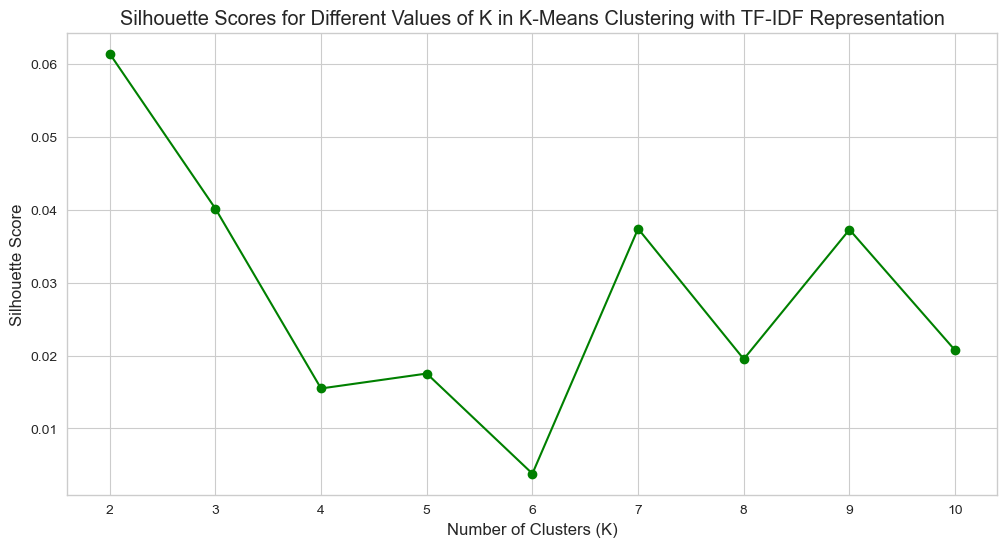

'\nInterpretation:\nThe silhouette scores indicate that the optimal number of clusters is 7, since this value of k has the \nhighest silhouette score after 3. Therefore, I will use k=7 for the K-Means clustering with the TF-IDF \nrepresentation.\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,review_id,file_name,tfidf_cluster
0,1,rev1_pine_valley_1,6
1,2,rev2_pine_valley_2,2
2,3,rev3_cypress_point_1,1
3,4,rev4_cypress_point_2,2
4,5,rev5_shinnecock_1,2


tfidf_cluster
0     3
1    14
2    24
3     2
4     3
5     2
6    12
Name: count, dtype: int64

In [7]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 2. K-Means clustering with TF-IDF representation ###
## Use Silhouette score to determine the optimal number of clusters ##
# Perform K-Means clustering for each value of k
# Initialize the list to store silhouette scores
silhouette_scores_list = []
# Define the range of k values to test
k_values = range(2, 11)
# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores_list.append(silhouette_avg)
# List the silhouette scores for each value of k
silhouette_scores_list
# Plot the silhouette scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores_list, marker='o', color = 'green')
plt.title('Silhouette Scores for Different Values of K in K-Means Clustering with TF-IDF Representation')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The silhouette scores indicate that the optimal number of clusters is 7, since this value of k has the 
highest silhouette score after 3. Therefore, I will use k=7 for the K-Means clustering with the TF-IDF 
representation.
"""

# Perform K-Means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)
# Add the cluster labels to the DataFrame
golf_course_review['tfidf_cluster'] = cluster_labels
# Display the cluster labels
golf_course_review[['review_id', 'file_name', 'tfidf_cluster']].head()
# Calculate the number of reviews in each cluster
cluster_counts = golf_course_review['tfidf_cluster'].value_counts().sort_index()
# Display the number of reviews in each cluster
cluster_counts

'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='MDS1', ylabel='MDS2'>

Text(0.5, 1.0, 'MDS Visualization of TF-IDF K-Means Clusters')

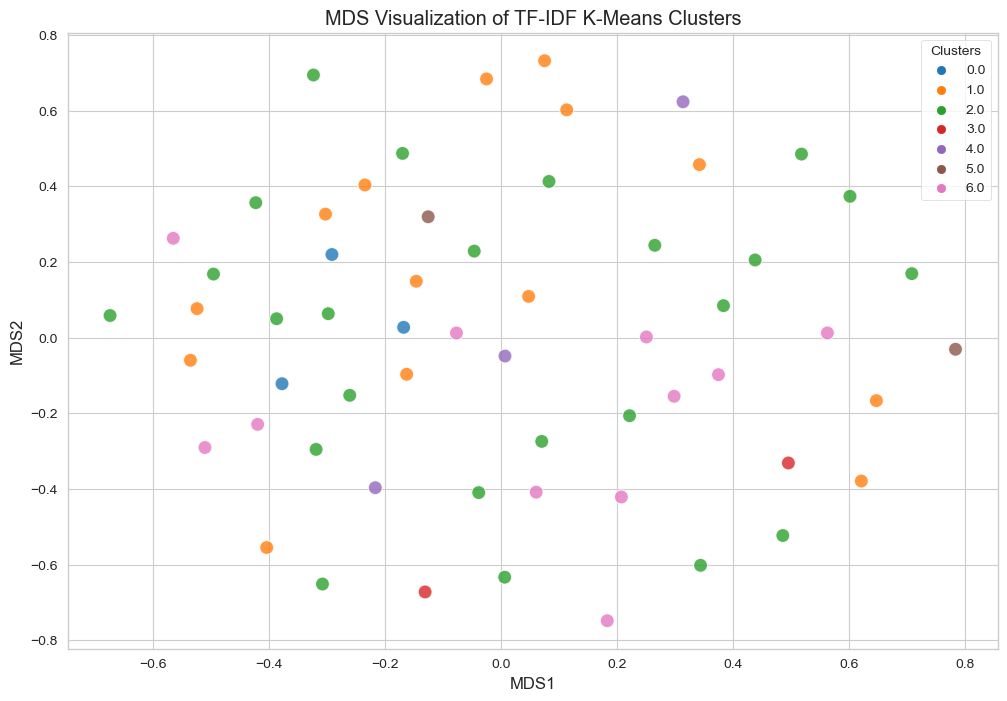

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='PCA1', ylabel='PCA2'>

Text(0.5, 1.0, 'PCA Visualization of TF-IDF K-Means Clusters')

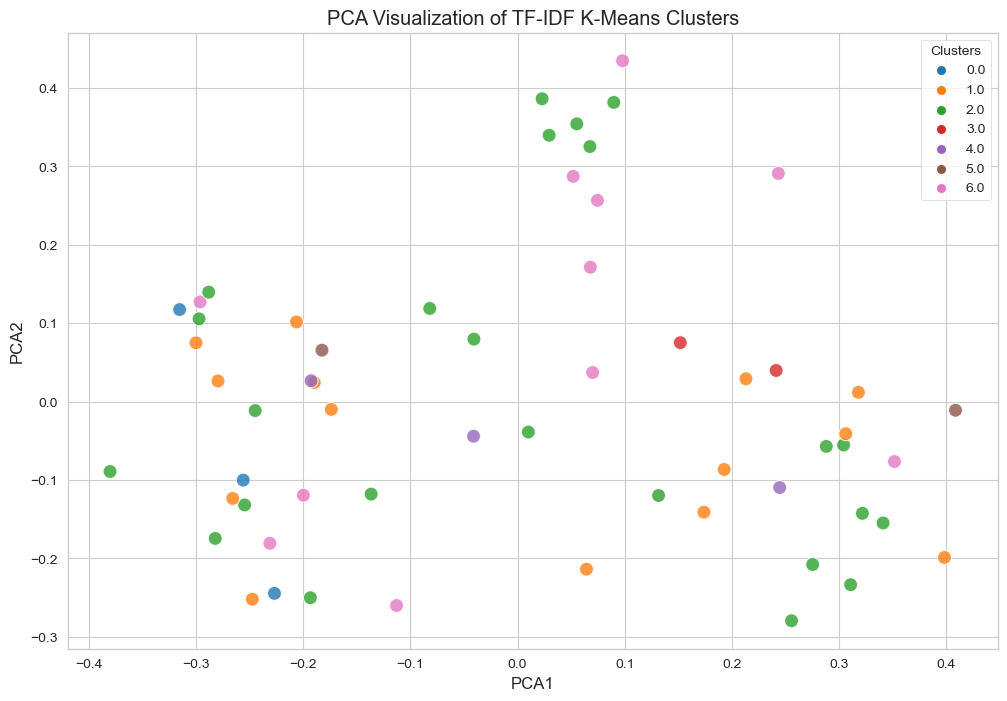

In [8]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND WORD2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 3. Visualization of TF-IDF clusters using Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) ###
# 3.a Multidimensional Scaling (MDS) visualization
# Create a similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
# Perform MDS to reduce the dimensionality of the similarity matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(1 - similarity_matrix)
# Convert the MDS coordinates to a DataFrame
mds_df = pd.DataFrame(mds_coordinates, columns=['MDS1', 'MDS2'], index=golf_course_review['review_id'])
# Add the cluster labels to the MDS DataFrame
mds_df['tfidf_cluster'] = golf_course_review['tfidf_cluster']
# Plot the MDS visualization of the TF-IDF clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mds_df, x='MDS1', y='MDS2', hue='tfidf_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('MDS Visualization of TF-IDF K-Means Clusters')
plt.legend(title='Clusters', loc='upper right')
plt.show()

# 3.b Principal Component Analysis (PCA) visualization
from sklearn.decomposition import PCA
# Perform PCA to reduce the dimensionality of the TF-IDF matrix
pca = PCA(n_components=2, random_state=42)
pca_coordinates = pca.fit_transform(tfidf_matrix.toarray())
# Convert the PCA coordinates to a DataFrame
pca_df = pd.DataFrame(pca_coordinates, columns=['PCA1', 'PCA2'], index=golf_course_review['review_id'])
# Add the cluster labels to the PCA DataFrame
pca_df['tfidf_cluster'] = golf_course_review['tfidf_cluster']
# Plot the PCA visualization of the TF-IDF clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='tfidf_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of TF-IDF K-Means Clusters')
plt.legend(title = 'Clusters', loc='upper right')
plt.show()

In [9]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data ###
# Create a list of TaggedDocument objects for the Doc2Vec model
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(golf_course_review['cleaned_review_text'].apply(str.split))]

# Train the Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

# Infer vectors for the golf course reviews - this is done by passing the cleaned review text to the model
doc2vec_df = pd.DataFrame()
for i in range(0, len(golf_course_review)):
    vector = pd.DataFrame(model.infer_vector(golf_course_review['cleaned_review_text'][i].split()).reshape(1,-1))
    doc2vec_df = pd.concat([doc2vec_df, vector], axis=0)

# Reset the index of the Doc2Vec DataFrame
doc2vec_df = doc2vec_df.reset_index()

# Add the file name to the Doc2Vec DataFrame
doc_titles = {'title': golf_course_review['file_name']}
t = pd.DataFrame(doc_titles)

# Concatenate the file name to the Doc2Vec DataFrame
doc2vec_df = pd.concat([doc2vec_df, t], axis = 1)

# Drop the 'index' column from the Doc2Vec DataFrame
doc2vec_df = doc2vec_df.drop(columns = ['index'], axis = 1)

# Display the Doc2Vec DataFrame
doc2vec_df.head()

'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,title
0,-1.243099,-1.138185,-1.376547,-0.056506,1.567288,0.956555,0.102603,-1.253069,-1.456100,0.512887,...,2.615468,-2.030458,-1.253375,-0.753403,1.364511,0.738338,-0.631106,1.127137,0.327398,rev1_pine_valley_1
1,-0.398889,-0.711015,-1.110773,-0.009432,0.476896,-0.705237,-0.292282,-0.406643,-1.661556,-0.280780,...,2.111458,-1.745750,-0.439000,-0.275866,1.623783,0.690590,-0.383728,0.885080,0.390591,rev2_pine_valley_2
2,-0.358017,-0.700281,-0.985451,-0.259189,0.381534,-0.581862,-0.305317,-0.403922,-1.350861,-0.228618,...,1.807298,-1.320757,-0.497290,-0.085614,1.176775,0.732137,-0.376846,0.594005,0.158374,rev3_cypress_point_1
3,-0.294586,-0.703638,-1.107576,-0.161552,0.187396,-1.121907,-0.360863,-0.258685,-1.726727,-0.550335,...,2.015072,-1.587049,-0.372964,-0.000390,1.554451,0.904121,-0.370071,0.683364,0.384032,rev4_cypress_point_2
4,-0.038272,-0.686949,-1.241229,-0.248429,0.140963,-1.438355,-0.865574,-0.219691,-1.957330,-0.311022,...,2.039359,-1.747880,-0.322078,-0.248795,1.833666,0.756405,-0.256767,0.617970,0.206999,rev5_shinnecock_1


'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kme

[0.35957955389839136,
 0.40175187453941064,
 0.4477576070515018,
 0.48424478203915633,
 0.533241835451146,
 0.5277228815288983,
 0.4553443222037622,
 0.4645492626957219,
 0.388294476138967]

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Values of K in K-Means Clustering with Doc2Vec Representation')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhoette Score')

([<matplotlib.axis.XTick at 0x154ffd9d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

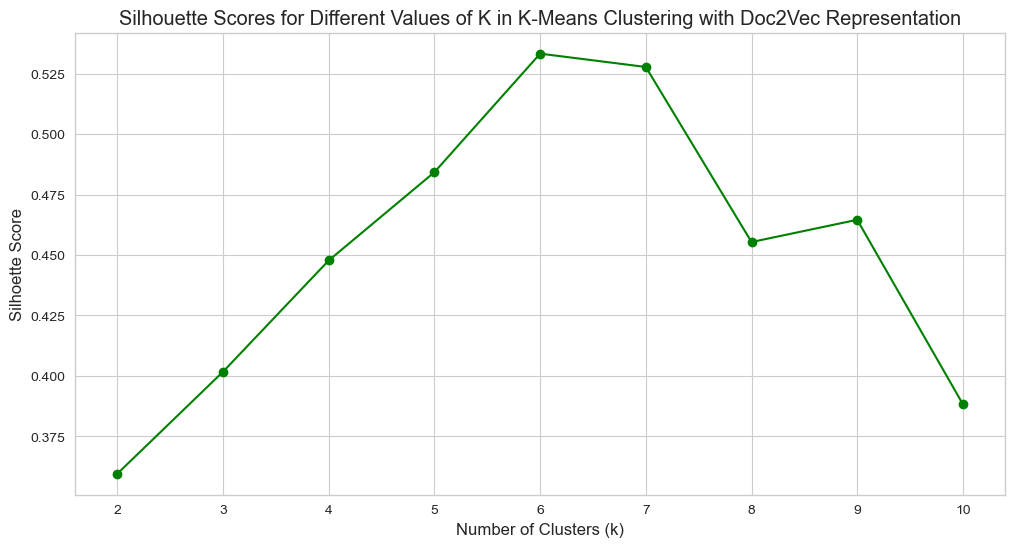

'\nInterpretation:\nThe silhouette scores indicate that the optimal number of clusters is 4, since this value of k has the highest silhouette score.\nTherefore, I will use k=2 for the K-Means clustering with the Doc2Vec representation.\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,title,doc2vec_cluster
0,rev1_pine_valley_1,4
1,rev2_pine_valley_2,5
2,rev3_cypress_point_1,0
3,rev4_cypress_point_2,1
4,rev5_shinnecock_1,1


doc2vec_cluster
0    16
1    19
2     2
3     3
4     2
5    18
Name: count, dtype: int64

In [58]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 5. K-Means clustering with Doc2Vec representation ###
## Use Silhouette score to determine the optimal number of clusters ##
# Convert the Doc2Vec DataFrame to a matrix
doc2vec_matrix = doc2vec_df.drop(columns='title').values

# Perform K-Means clustering for each of the k values
silhouette_scores_list_doc2vec = []
# Define the range of k values to test
k_values = range(2, 11)
# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(doc2vec_matrix)
    silhouette_avg = silhouette_score(doc2vec_matrix, cluster_labels)
    silhouette_scores_list_doc2vec.append(silhouette_avg)
# List the silhouette scores for each value of k
silhouette_scores_list_doc2vec

# Plot the silhouette scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores_list_doc2vec, marker='o', color='green')
plt.title('Silhouette Scores for Different Values of K in K-Means Clustering with Doc2Vec Representation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The silhouette scores indicate that the optimal number of clusters is 4, since this value of k has the highest silhouette score.
Therefore, I will use k=2 for the K-Means clustering with the Doc2Vec representation.
"""

# Perform K-Means clustering with k=4
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(doc2vec_matrix)
# Add the cluster labels to the Doc2Vec DataFrame
doc2vec_df['doc2vec_cluster'] = cluster_labels
# Display the cluster labels
doc2vec_df[['title', 'doc2vec_cluster']].head()

# Calculate the number of reviews in each cluster
cluster_counts_doc2vec = doc2vec_df['doc2vec_cluster'].value_counts().sort_index()
# Display the number of reviews in each cluster
cluster_counts_doc2vec

'\nPHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING\n'

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,MDS1,MDS2,title,doc2vec_cluster,file_name,review_author
0,-0.168872,0.074258,rev1_pine_valley_1,4,rev1_pine_valley_1,David Jones
1,-0.003137,-0.056758,rev2_pine_valley_2,5,rev2_pine_valley_2,Bill Satterfield
2,-0.010450,0.045378,rev3_cypress_point_1,0,rev3_cypress_point_1,top100golfcourses
3,0.024575,-0.014834,rev4_cypress_point_2,1,rev4_cypress_point_2,Bill Satterfield
4,0.048172,-0.037015,rev5_shinnecock_1,1,rev5_shinnecock_1,Andrew Harvey


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='MDS1', ylabel='MDS2'>

Text(0.5, 1.0, 'MDS Visualization of Doc2Vec K-Means Clusters')

Text(-0.16887201345790243, 0.07425758528238988, 'David Jones')

Text(-0.0031368430884438614, -0.05675811746946522, 'Bill Satterfield')

Text(-0.010449915447655523, 0.04537825168927147, 'top100golfcourses')

Text(0.02457450992932671, -0.014833747466893268, 'Bill Satterfield')

Text(0.048171802211592535, -0.037015249122840266, 'Andrew Harvey')

Text(-0.08139955748937276, -0.03676656407818559, 'David Jones')

Text(-0.07034738375783048, -0.03701244690172455, 'David Jones')

Text(0.022112355315805562, -0.027566718796648966, 'Graylyl Loomis')

Text(-0.016151940999187344, 0.05094483737263544, 'top100golfcourses')

Text(0.04781433406633738, -0.03111491283460357, 'Graylyl Loomis')

Text(-0.03724212474929941, -0.040535590060992305, 'Andy Johnson')

Text(-0.027975086937367492, 0.04925218626166709, 'top100golfcourses')

Text(0.018429999600191645, -0.0229306718198435, 'Bill Satterfield')

Text(-0.22047508708696528, 0.14345425263764697, 'John Sabino')

Text(-0.057081753467735856, -0.037091898649796014, 'David Jones')

Text(0.053263948566154545, -0.039930232413363576, 'Andrew Harvie')

Text(0.2277040849184007, -0.07228862130490232, 'Andy Johnson')

Text(-0.03511751936466412, -0.039250688373276506, 'top100golfcourses')

Text(-0.022812312065659035, 0.06443914139880044, 'top100golfcourses')

Text(0.025340230309853072, 0.04702196487416658, 'Bill Satterfield')

Text(-0.06389731895555789, -0.03574939783118739, 'David Jones')

Text(0.06706140913657391, -0.04777801556978349, 'Andrew Harvie')

Text(0.04836689640404528, 0.09323445294269007, 'Sean Ogle')

Text(0.07711592898865759, -0.036412421487426586, 'Bill Satterfield')

Text(0.05274564823283804, -0.026499392114399507, 'Bill Satterfield')

Text(-0.040712330499343065, 0.06739915060706708, 'top100golfcourses')

Text(-0.034457061229164455, 0.06425862520005567, 'top100golfcourses')

Text(-0.06426558556605419, -0.03803344964833922, 'David Jones')

Text(-0.04591120488074671, -0.035509566882107046, 'David Jones')

Text(-0.03434682376089287, -0.03791979347132615, 'top100golfcourses')

Text(-0.011185219626488985, -0.04357456813212026, 'Andy Johnson')

Text(-0.038961916774338884, -0.04248925036003529, 'David Jones')

Text(0.060485231256430856, -0.038102934075730135, 'Andrew Harvie')

Text(-0.054974771288305635, 0.1405206239946703, 'Sean Ogle')

Text(-0.013000929692276035, -0.04826875391577614, 'Andy Johnson')

Text(-0.026699962411755814, 0.05513427796767643, 'top100golfcourses')

Text(-0.04262020075560427, -0.03583246526020527, 'top100golfcourses')

Text(0.026906751331369667, 0.08260820393617109, 'Sean Ogle')

Text(-0.017610591481680267, 0.041244947997058044, 'top100golfcourses')

Text(0.039808369961464286, -0.025984072795176012, 'Bill Satterfield')

Text(-0.00933396274546934, -0.044524200560121276, 'Cal Simmons')

Text(0.09561743082021124, -0.0547402428047449, 'Ari Techner')

Text(-0.03447523471787167, 0.04997752377341835, 'top100golfcourses')

Text(0.09039505897046851, -0.012252296770274292, 'nan')

Text(-0.0399385645925686, -0.03649516617898218, 'Phillip Johnson')

Text(-0.01776152600120256, 0.05013850207756653, 'top100golfcourses')

Text(-0.008526155040861062, 0.03917828270171587, 'top100golfcourses')

Text(0.033060206831671456, -0.01618906965350036, 'Bill Satterfield')

Text(0.25118239861892355, -0.07855531928601689, 'Andy Johnson')

Text(0.014514740705290022, 0.06905482872117726, 'top100golfcourses')

Text(-0.01645298898595345, 0.05704346469635139, 'top100golfcourses')

Text(0.041390931169715706, -0.020922834649944086, 'Bill Satterfield')

Text(-0.04098319315948841, -0.03698324908225405, 'nan')

Text(0.05274976017963129, -0.028950304529360947, 'Bill Satterfield')

Text(-0.06757337402456552, -0.03636689009078156, 'David Jones')

Text(-0.030051708551135512, 0.0665007297413124, 'top100golfcourses')

Text(0.026385083764895154, -0.02111960394230641, 'Sean Ogle')

Text(-0.01827123683089, 0.060713360459497566, 'top100golfcourses')

Text(0.029873363197064646, -0.02209725904076011, 'Graylyl Loomis')

Text(0.04800292499738545, -0.017309216907810922, 'Bill Satterfield')

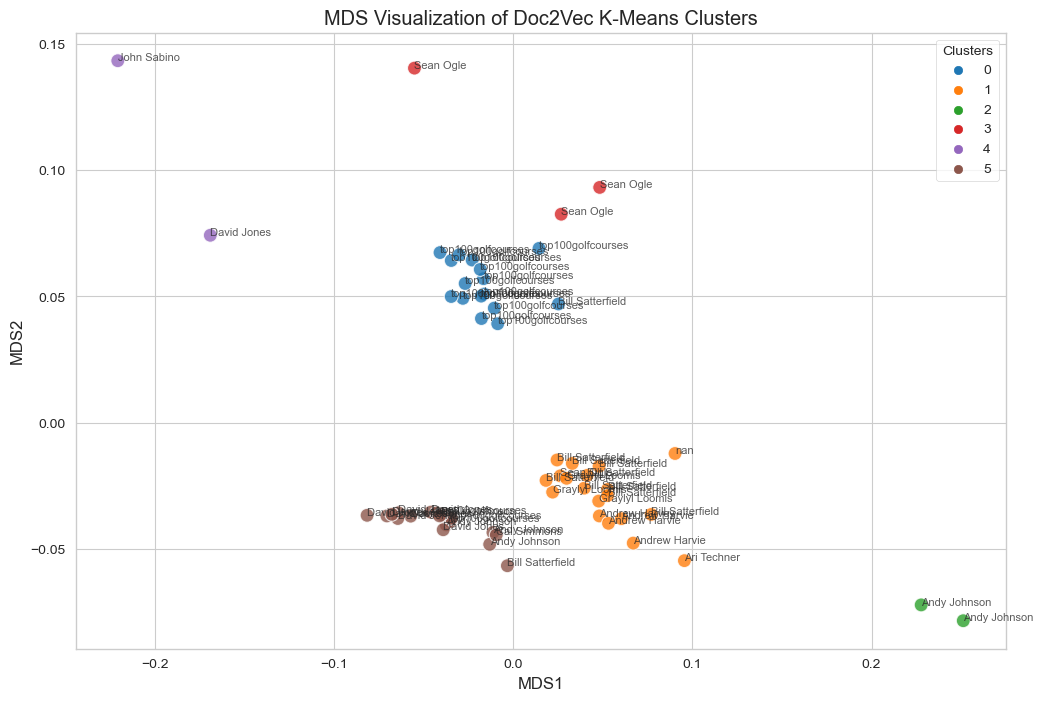

,PCA1,PCA2,title,doc2vec_cluster,file_name,review_author
0,4.936141,0.028068,rev1_pine_valley_1,4,rev1_pine_valley_1,David Jones
1,-0.378023,-1.477941,rev2_pine_valley_2,5,rev2_pine_valley_2,Bill Satterfield
2,0.866053,1.517556,rev3_cypress_point_1,0,rev3_cypress_point_1,top100golfcourses
3,-0.818282,-0.095242,rev4_cypress_point_2,1,rev4_cypress_point_2,Bill Satterfield
4,-2.159497,-0.346250,rev5_shinnecock_1,1,rev5_shinnecock_1,Andrew Harvey


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='PCA1', ylabel='PCA2'>

Text(0.5, 1.0, 'PCA Visualization of Doc2Vec K-Means Clusters')

Text(4.936141452886959, 0.028067910491026204, 'David Jones')

Text(-0.37802321994963073, -1.4779410771497268, 'Bill Satterfield')

Text(0.866053204438325, 1.517556024478051, 'top100golfcourses')

Text(-0.8182824294481803, -0.09524157897607839, 'Bill Satterfield')

Text(-2.159497260335888, -0.34624996160707777, 'Andrew Harvey')

Text(2.114432480266156, -2.5234975082374835, 'David Jones')

Text(1.7727181215254315, -2.372306183207808, 'David Jones')

Text(-1.2277757726981742, -0.5415476547368654, 'Graylyl Loomis')

Text(1.0441667145622269, 1.5436595344803747, 'top100golfcourses')

Text(-2.0393410258031435, -0.16445994112204038, 'Graylyl Loomis')

Text(0.6250355719410505, -2.1963896232633418, 'Andy Johnson')

Text(1.432356183343686, 1.2939367178316146, 'top100golfcourses')

Text(-1.0656467317998644, -0.5598598654661022, 'Bill Satterfield')

Text(8.029625730073183, 1.1811735776838288, 'John Sabino')

Text(1.3166757099615067, -2.025220942980587, 'David Jones')

Text(-2.2474945406035647, -0.30092745709285806, 'Andrew Harvie')

Text(-6.695179136097308, 1.2002579901422301, 'Andy Johnson')

Text(0.5812468613429234, -1.7810115990218893, 'top100golfcourses')

Text(1.2981784798450358, 1.7296212554574082, 'top100golfcourses')

Text(-0.00388577713741073, 1.90503277482268, 'Bill Satterfield')

Text(1.5958865086050211, -2.1718754228396815, 'David Jones')

Text(-2.6266081640584535, -0.2775173718135064, 'Andrew Harvie')

Text(0.16978872293749292, 3.2955685464221998, 'Sean Ogle')

Text(-2.773247083737327, 0.18774815172659656, 'Bill Satterfield')

Text(-2.070790872257415, -0.08908744993965902, 'Bill Satterfield')

Text(1.8139946527848938, 1.5284196437469861, 'top100golfcourses')

Text(1.638322233449535, 1.5627808066175286, 'top100golfcourses')

Text(1.549089415660636, -2.332862450899009, 'David Jones')

Text(1.0217675787260139, -1.870866509855983, 'David Jones')

Text(0.5957911558268769, -1.849926564881588, 'top100golfcourses')

Text(-0.25932299508722645, -1.5833228350667368, 'Andy Johnson')

Text(0.6524920242578061, -2.0359621922775615, 'David Jones')

Text(-2.3216270760893107, -0.12279022067506733, 'Andrew Harvie')

Text(2.9325563616188903, 2.75632105002139, 'Sean Ogle')

Text(-0.3589404276593254, -2.039926480295542, 'Andy Johnson')

Text(1.3833218891813515, 1.4750224836229828, 'top100golfcourses')

Text(0.8741455454096645, -1.6180303681636439, 'top100golfcourses')

Text(0.23647670158342962, 3.2354782339042543, 'Sean Ogle')

Text(1.017639385235602, 1.2480970013551569, 'top100golfcourses')

Text(-1.7199106660314945, -0.20510176628233595, 'Bill Satterfield')

Text(-0.383834494851791, -1.781209809664481, 'Cal Simmons')

Text(-3.3177463203857975, -0.0006035506671015067, 'Ari Techner')

Text(1.7209399162253265, 1.2100610822923938, 'top100golfcourses')

Text(-2.0873592582278317, 0.11288859819034532, 'nan')

Text(0.8097770369271426, -1.8470415128532613, 'Phillip Johnson')

Text(1.1127166606486292, 1.507889354372821, 'top100golfcourses')

Text(0.7246554543146939, 1.3678634641850316, 'top100golfcourses')

Text(-1.1719850461196297, -0.23508320701841368, 'Bill Satterfield')

Text(-7.45079552580381, 1.5019745377803335, 'Andy Johnson')

Text(0.3318913899092429, 2.098489233195102, 'top100golfcourses')

Text(1.0791046107814422, 1.6662483716793306, 'top100golfcourses')

Text(-1.4484543847400984, 0.06015554327231403, 'Bill Satterfield')

Text(0.8149001260227394, -1.8017381851496572, 'nan')

Text(-2.148332343384422, -0.1246413102244362, 'Bill Satterfield')

Text(1.6398326386096211, -2.126138476496839, 'David Jones')

Text(1.4763489071749605, 1.6685675810554852, 'top100golfcourses')

Text(-1.0771808646073113, -0.32139447953113737, 'Sean Ogle')

Text(1.1333564833204972, 1.7159716167001764, 'top100golfcourses')

Text(-1.187422179931031, -0.10234248924471565, 'Graylyl Loomis')

Text(-1.3027423125525601, 0.3232649611745709, 'Bill Satterfield')

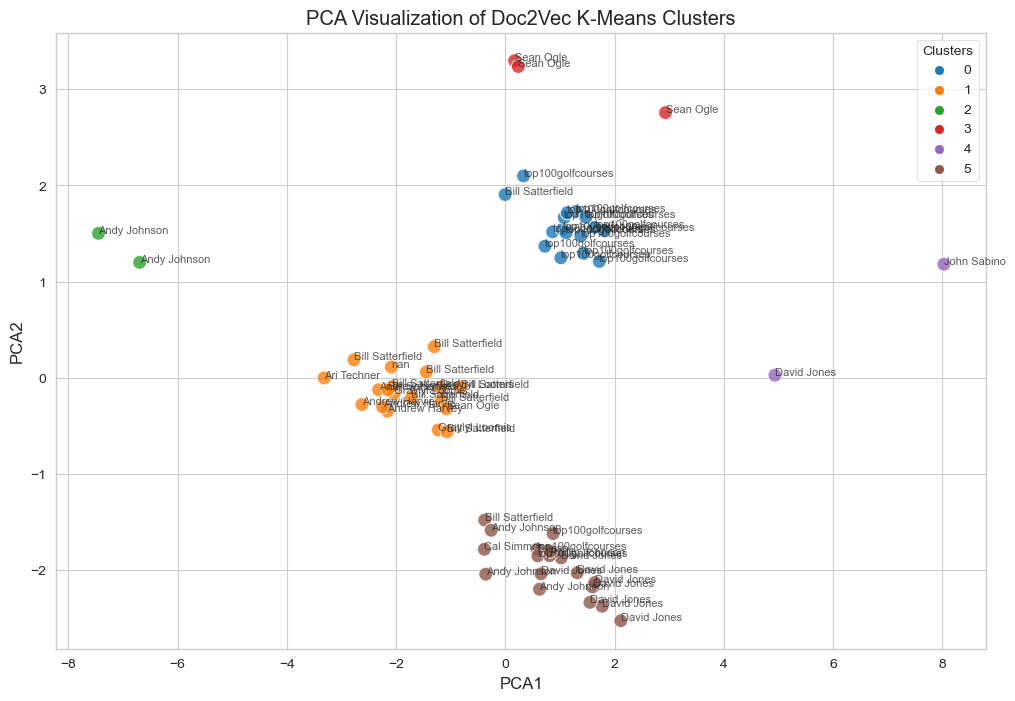

In [64]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 6. Visualization of Doc2Vec clusters using Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) ###
# 6.a Multidimensional Sclaing (MDS) visualization
# Create a similarity matrix using cosine similarity
similarity_matrix_doc2vec = cosine_similarity(doc2vec_matrix)

# Perform MDS to reduce the dimensionality of the similarity matrix
mds_doc2vec = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# Fit and transform the MDS coordinates
mds_coordinates_doc2vec = mds_doc2vec.fit_transform(1 - similarity_matrix_doc2vec)

# Convert the MDS coordinates to a DataFrame
mds_df_doc2vec = pd.DataFrame(mds_coordinates_doc2vec, columns=['MDS1', 'MDS2'], index=doc2vec_df['title'])

# Add the cluster labels to the MDS DataFrame
mds_df_doc2vec = mds_df_doc2vec.merge(doc2vec_df[['title', 'doc2vec_cluster']], left_index=True, right_on='title')

# Add the course review author to the MDS DataFrame (this information is in the original golf_course_review DataFrame under the 'review_author' column)
# Merge the MDS DataFrame with the golf_course_review DataFrame to get the review author
mds_df_doc2vec = mds_df_doc2vec.merge(golf_course_review[['file_name', 'review_author']], left_on='title', right_on='file_name')

# Check the MDS DataFrame
mds_df_doc2vec.head()

# Plot the MDS visualization of the Doc2Vec clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mds_df_doc2vec, x='MDS1', y='MDS2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('MDS Visualization of Doc2Vec K-Means Clusters')
plt.legend(title='Clusters', loc='upper right')
# Add an annotation to the plot of the review author
for i in range(len(mds_df_doc2vec)):
    plt.text(mds_df_doc2vec['MDS1'][i], mds_df_doc2vec['MDS2'][i], mds_df_doc2vec['review_author'][i], fontsize=8, alpha=0.75)
plt.show()

# 6.b Principal Component Analysis (PCA) visualization
# Perform PCA to reduce the dimensionality of the Doc2Vec matrix
pca_doc2vec = PCA(n_components=2, random_state=42)

# Fit and transform the PCA coordinates
pca_coordinates_doc2vec = pca_doc2vec.fit_transform(doc2vec_matrix)

# Convert the PCA coordinates to a DataFrame
pca_df_doc2vec = pd.DataFrame(pca_coordinates_doc2vec, columns=['PCA1', 'PCA2'], index=doc2vec_df['title'])

# Add the cluster labels to the PCA DataFrame
pca_df_doc2vec = pca_df_doc2vec.merge(doc2vec_df[['title', 'doc2vec_cluster']], left_index=True, right_on='title')

# Add the course review author to the PCA DataFrame
pca_df_doc2vec = pca_df_doc2vec.merge(golf_course_review[['file_name', 'review_author']], left_on='title', right_on='file_name')

# Check the PCA DataFrame
pca_df_doc2vec.head()

# Plot the PCA visualization of the Doc2Vec clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_doc2vec, x='PCA1', y='PCA2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of Doc2Vec K-Means Clusters')
plt.legend(title = 'Clusters', loc='upper right')
# Add an annotation to the plot of the review author
for i in range(len(pca_df_doc2vec)):
    plt.text(pca_df_doc2vec['PCA1'][i], pca_df_doc2vec['PCA2'][i], pca_df_doc2vec['review_author'][i], fontsize=8, alpha=0.75)
plt.show()




In [34]:
"""
PHASE 4: TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA)

In this phase, I will perform topic modeling on the golf course reviews using Latent Dirichlet Allocation (LDA). 
I will perform the following steps to extract topics from the reviews:
    1. Tokenization: Tokenize the preprocessed text data
    2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data
    3. LDA model training: Train an LDA model on the corpus
    4. Topic extraction: Extract topics from the LDA model
    5. Visualization: Visualize the topics using the pyLADavis library
    
    Note: The number of topics in the LDA model is a hyperparameter that needs to be tuned.
"""

'\nPHASE 4: TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA)\n\nIn this phase, I will perform topic modeling on the golf course reviews using Latent Dirichlet Allocation (LDA). \nI will perform the following steps to extract topics from the reviews:\n    1. Tokenization: Tokenize the preprocessed text data\n    2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data\n    3. LDA model training: Train an LDA model on the corpus\n    4. Topic extraction: Extract topics from the LDA model\n    5. Visualization: Visualize the topics using the pyLADavis library\n    \n    Note: The number of topics in the LDA model is a hyperparameter that needs to be tuned.\n'